In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
data_set_path='https://raw.githubusercontent.com/vahidseydi/Regression/master/kc_house_data.csv'
data=pd.read_csv(data_set_path)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
y=data['price']
X=data
X=X.drop(['price'],axis=1)
X.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
features=['bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','yr_renovated','sqft_living15','sqft_lot15','sqft_basement','sqft_above','grade','lat','long']
H=X[features]

# Ridge using validation set

In [6]:
X_train_val, X_test , y_train_val, y_test = train_test_split(H, y, test_size=0.5, random_state=1)
X_train_val.shape

(10806, 14)

In [7]:
X_train, X_val , y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)
X_train.shape

(8104, 14)

In [8]:
alphas1 = np.array([1e-5,1e-10,1e-15,1e-20, 1e-100])
alphas2 = np.linspace(1,0.01,10)
alphas3 = np.linspace(100,2,10)
alphas  = np.append(alphas3, alphas2)
alphas  = np.append(alphas, alphas1)
alphas

array([1.00000000e+002, 8.91111111e+001, 7.82222222e+001, 6.73333333e+001,
       5.64444444e+001, 4.55555556e+001, 3.46666667e+001, 2.37777778e+001,
       1.28888889e+001, 2.00000000e+000, 1.00000000e+000, 8.90000000e-001,
       7.80000000e-001, 6.70000000e-001, 5.60000000e-001, 4.50000000e-001,
       3.40000000e-001, 2.30000000e-001, 1.20000000e-001, 1.00000000e-002,
       1.00000000e-005, 1.00000000e-010, 1.00000000e-015, 1.00000000e-020,
       1.00000000e-100])

In [9]:
ridge = Ridge(normalize = True)
coefs = []
mse_val = []
mse_train = []

In [10]:
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    pred_val = ridge.predict(X_val)
    pred_train = ridge.predict(X_train)
    mse_val.append(mean_squared_error(y_val, pred_val))
    mse_train.append(mean_squared_error(y_train, pred_train))


In [11]:
coef_array =np.zeros((len(features),len(alphas)))
for i in range(len(features)):
    for j in range(len(alphas)):
        coef_array[i,j]= coefs[j][i]

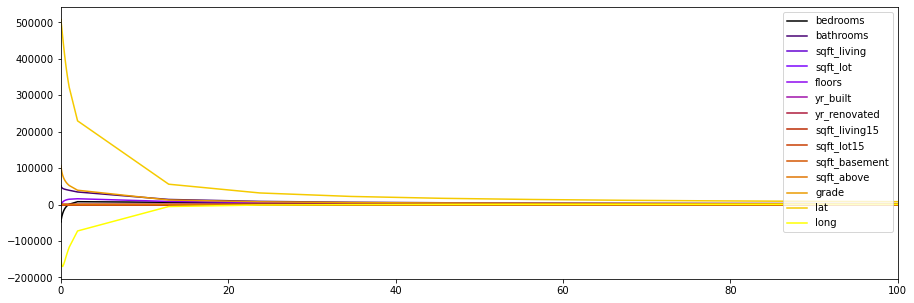

In [12]:
fig = plt.figure(figsize=(15,5))
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(features))]
plt.xlim(min(alphas),max(alphas))
for i in range(coef_array.shape[0]):
    plt.plot(alphas,coef_array[i,:],color=colors[i],label=str(features[i]))
plt.legend(loc='upper right')

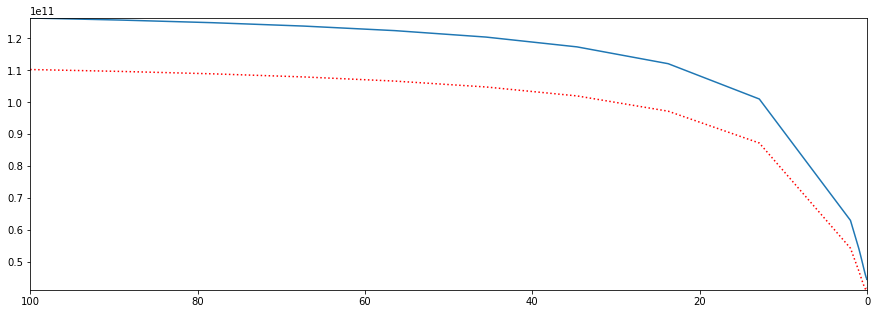

In [13]:
fig = plt.figure(figsize=(15,5))
plt.axis([max(alphas),min(alphas),min(min(mse_val),min(mse_train)),max(max(mse_val),max(mse_train))])
plt.plot(alphas,mse_train)
plt.plot(alphas,mse_val,':r')



In [14]:
print('mse train = {} and mse validation ={}'.format(mse_train[-1],mse_val[-1]))

mse train = 44587593911.63647 and mse validation =41908425836.10316


# Ridge using k-fold cross validation

In [15]:
X_train_val.reset_index(inplace=True,drop=True)
y_train_val.reset_index(inplace=True, drop=True)

In [16]:
k=10
kfold = KFold(n_splits=k, random_state=1, shuffle=True)

In [17]:
train_index_list = []
val_idex_list = []
for train_index , val_index in kfold.split(X_train_val):
    train_index_list.append(train_index)
    val_idex_list.append(val_index)
    

In [18]:
MSE_VAL =[]
MSE_TRAIN =[]
COEFS = []
for a in alphas:
    ridge.set_params(alpha = a)
    mse_val = 0
    mse_train =0
    coefs = np.zeros((len(features),))
    for split  in range(k):
        train_index = train_index_list[split]
        val_index = val_idex_list[split]
        
        X_train , X_val = X_train_val.iloc[train_index,:],X_train_val.iloc[val_index,:]
        y_train , y_val = y_train_val[train_index] , y_train_val[val_index]   
        
    
        ridge.fit(X_train, y_train)
        pred_val = ridge.predict(X_val)
        pred_train = ridge.predict(X_train)
        mse_val += mean_squared_error(y_val, pred_val)
        mse_train += mean_squared_error(y_train, pred_train)
        coefs += ridge.coef_

    
    MSE_VAL.append(mse_val/k)
    MSE_TRAIN.append(mse_train/k)
    COEFS.append(coefs/k)    
   

In [19]:
coef_array =np.zeros((len(features),len(alphas)))
for i in range(len(features)):
    for j in range(len(alphas)):
        coef_array[i,j]= COEFS[j][i]

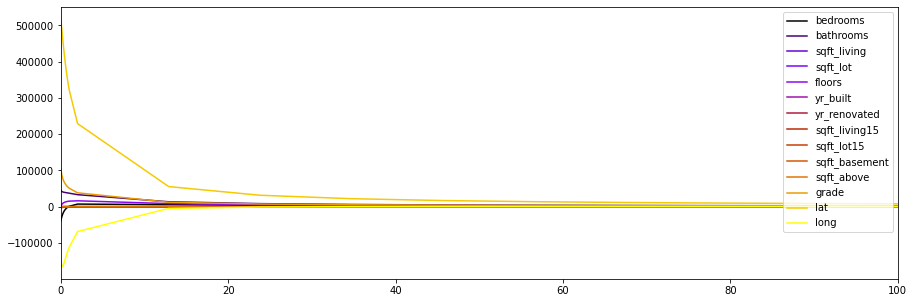

In [20]:
fig = plt.figure(figsize=(15,5))
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(features))]
plt.xlim(min(alphas),max(alphas))
for i in range(coef_array.shape[0]):
    plt.plot(alphas,coef_array[i,:],color=colors[i],label=str(features[i]))
plt.legend(loc='upper right')

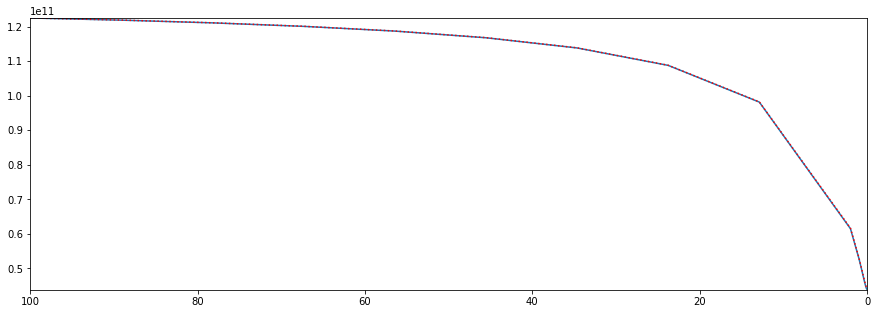

In [21]:
fig = plt.figure(figsize=(15,5))
plt.axis([max(alphas),min(alphas),min(MSE_TRAIN),max(MSE_TRAIN)])
plt.plot(alphas,MSE_TRAIN)
plt.plot(alphas,MSE_VAL,':r')


# Ridge using k-fold cross validation and grid search

In [22]:
parameters = {"alpha":alphas}
grid_ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
grid_ridge_regression.fit(X_train_val, y_train_val)

GridSearchCV(cv=10, estimator=Ridge(alpha=1e-100, normalize=True),
             param_grid={'alpha': array([1.00000000e+002, 8.91111111e+001, 7.82222222e+001, 6.73333333e+001,
       5.64444444e+001, 4.55555556e+001, 3.46666667e+001, 2.37777778e+001,
       1.28888889e+001, 2.00000000e+000, 1.00000000e+000, 8.90000000e-001,
       7.80000000e-001, 6.70000000e-001, 5.60000000e-001, 4.50000000e-001,
       3.40000000e-001, 2.30000000e-001, 1.20000000e-001, 1.00000000e-002,
       1.00000000e-005, 1.00000000e-010, 1.00000000e-015, 1.00000000e-020,
       1.00000000e-100])},
             scoring='neg_mean_squared_error')

In [23]:
val_result=grid_ridge_regression.cv_results_['mean_test_score']
val_result = -val_result

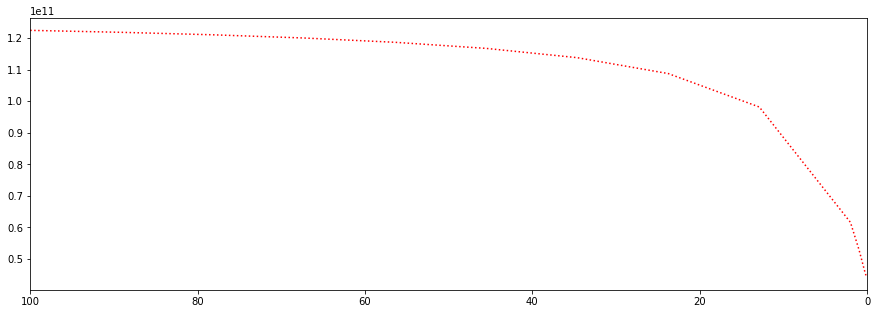

In [24]:
fig = plt.figure(figsize=(15,5))
plt.xlim(max(alphas),min(alphas))
plt.plot(alphas,val_result,':r')

# Ridge using k-fold cross validation and grid search and pipeline

In [25]:
from sklearn.pipeline import make_pipeline


In [26]:
pipeline_ridge = make_pipeline(Ridge(normalize = True))
parameters = {'ridge__alpha':alphas}
grid_pipeline_ridge = GridSearchCV(estimator=pipeline_ridge, 
                     param_grid = parameters,
                     scoring='neg_mean_squared_error',
                     cv=10,
                     refit=True,
                     n_jobs=1)



In [27]:
grid_pipeline_ridge.fit(X_train_val, y_train_val)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ridge', Ridge(normalize=True))]),
             n_jobs=1,
             param_grid={'ridge__alpha': array([1.00000000e+002, 8.91111111e+001, 7.82222222e+001, 6.73333333e+001,
       5.64444444e+001, 4.55555556e+001, 3.46666667e+001, 2.37777778e+001,
       1.28888889e+001, 2.00000000e+000, 1.00000000e+000, 8.90000000e-001,
       7.80000000e-001, 6.70000000e-001, 5.60000000e-001, 4.50000000e-001,
       3.40000000e-001, 2.30000000e-001, 1.20000000e-001, 1.00000000e-002,
       1.00000000e-005, 1.00000000e-010, 1.00000000e-015, 1.00000000e-020,
       1.00000000e-100])},
             scoring='neg_mean_squared_error')

In [28]:
val_result=grid_ridge_regression.cv_results_['mean_test_score']
val_result = -val_result

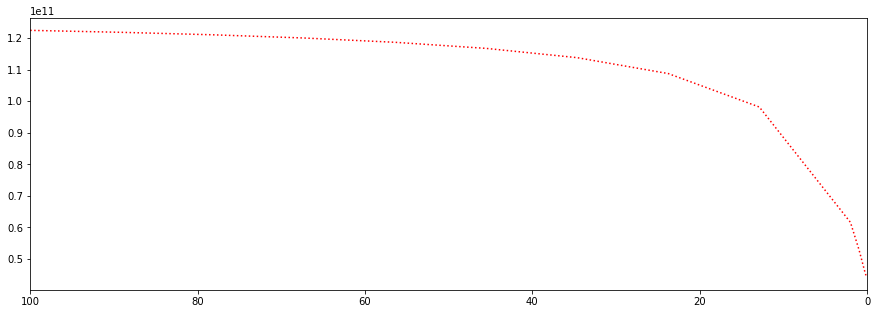

In [29]:
fig = plt.figure(figsize=(15,5))
plt.xlim(max(alphas),min(alphas))
plt.plot(alphas,val_result,':r')

# Ridge using RidgeCV


In [30]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True,store_cv_values=True)
ridgecv.fit(X_train_val, y_train_val)
ridgecv.alpha_

0.01

In [31]:
val_result=np.mean(ridgecv.cv_values_,axis=0)

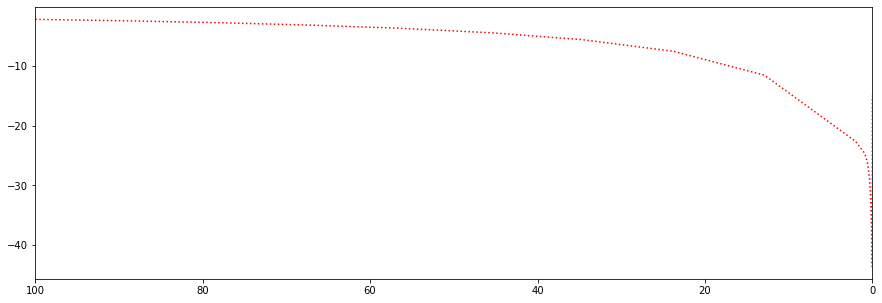

In [32]:
fig = plt.figure(figsize=(15,5))
plt.xlim(max(alphas),min(alphas))
plt.plot(alphas,val_result,':r')